In [83]:
#Dependancies

import pandas as pd
import matplotlib.pyplot as plt


In [84]:
df_a = pd.read_csv("./Resources/tech_layoffs.csv")

df_a

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00 UTC,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00 UTC,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00 UTC,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00 UTC,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00 UTC,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2913,TutorMundi,Sao Paulo,Brazil,South America,4,2020-04-24 00:00:00 UTC,100.000000,4,0,Education,Series A,$2,2020,-23.54750,-46.63611
1414,3039,Spyce,Boston,USA,North America,4,2020-04-08 00:00:00 UTC,12.000000,33,29,Food,Series A,$26,2020,42.35843,-71.05977
1415,3261,Flytedesk,Boulder,USA,North America,4,2020-03-18 00:00:00 UTC,20.000000,20,16,Marketing,Seed,$4,2020,40.01499,-105.27055
1416,447,FrontRow,Bengaluru,India,Asia,4,2023-07-10 00:00:00 UTC,100.000000,4,0,Education,Series A,$17,2023,12.97194,77.59369


In [85]:
#Data exploration
df_a.columns

Index(['#', 'Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'lng'],
      dtype='object')

In [86]:
#Data exploration
df_a.dtypes

#                                int64
Company                         object
Location_HQ                     object
Country                         object
Continent                       object
Laid_Off                         int64
Date_layoffs                    object
Percentage                     float64
Company_Size_before_Layoffs      int64
Company_Size_after_layoffs       int64
Industry                        object
Stage                           object
Money_Raised_in_$_mil           object
Year                             int64
lat                            float64
lng                            float64
dtype: object

In [87]:
df_a["Date_layoffs"] = pd.to_datetime(df_a['Date_layoffs'])

In [88]:
#Filter for only companies in the US and print to confirm filter worked
df_a = df_a[df_a['Country'] == "USA"]
df_a

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00+00:00,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00+00:00,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00+00:00,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00+00:00,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00+00:00,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,3121,Synergysuite,Salt Lake City,USA,North America,5,2020-04-02 00:00:00+00:00,7.000000,71,66,Food,Series A,$6,2020,40.76078,-111.89105
1412,3157,DialSource,Sacramento,USA,North America,5,2020-03-31 00:00:00+00:00,14.000000,36,31,Marketing,Series B,$26,2020,38.58157,-121.49440
1414,3039,Spyce,Boston,USA,North America,4,2020-04-08 00:00:00+00:00,12.000000,33,29,Food,Series A,$26,2020,42.35843,-71.05977
1415,3261,Flytedesk,Boulder,USA,North America,4,2020-03-18 00:00:00+00:00,20.000000,20,16,Marketing,Seed,$4,2020,40.01499,-105.27055


In [89]:
#Group by Industry and get the count of each to turn back into DataFrame
grouped_df_a = df_a.groupby(['Industry'])
grouped_df_a.count().head(10)

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Stage,Money_Raised_in_$_mil,Year,lat,lng
Industry,,,,,,,,,,,,,,,
AI,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Aerospace,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Construction,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Consumer,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
Crypto,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
Data,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
Education,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Energy,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Finance,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114


In [90]:
#Find total employees laid off in Top 5 companies and then all others and display results
industry_totals = grouped_df_a['Laid_Off'].sum()
top_5 = industry_totals.sort_values(ascending=False).head(5)
other = industry_totals.sort_values(ascending=False).reset_index().iloc[5:]
top_5_df = pd.DataFrame(top_5)
display(other)
display(top_5_df)

,Industry,Laid_Off
5,Real Estate,13511
6,Sales,12644
7,Healthcare,10167
8,Food,9700
9,Travel,7992
10,Hardware,7340
11,Fitness,6876
12,Crypto,5756
13,Infrastructure,5755
14,Security,5307


,Laid_Off
Industry,
Consumer,50217
Retail,41354
Other,23994
Transportation,23270
Finance,15446


In [91]:
#Add All others total to the top_5_df to get single dataframe for all data needed for visualizations
top_5_df = top_5_df.reset_index()
other_total = other["Laid_Off"].sum()
new_row = {'Industry':'All Others', 'Laid_Off':[other_total]}
new_row_df = pd.DataFrame(new_row)

industry_df = pd.concat([top_5_df, new_row_df], ignore_index=True)
industry_df = industry_df.set_index('Industry', drop=True)


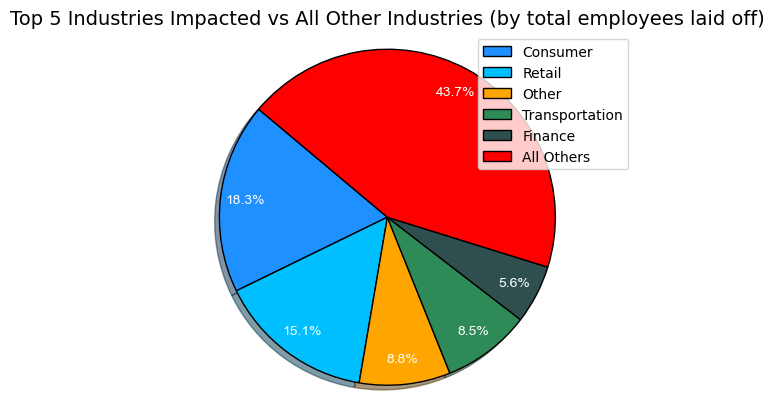

In [92]:
# Plot a pie chart for percentage comparison
# Define colors for the slices
colors = ['dodgerblue', 'deepskyblue', 'orange', 'seagreen', 'darkslategrey', 'red']

# Plot the pie chart
pie = industry_df.plot.pie(y='Laid_Off',
                           autopct='%1.1f%%',  # Display percentages
                           startangle=140,
                           shadow=True,
                           colors=colors,
                           pctdistance=0.85,
                           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
                           textprops={'rotation': 0, 'fontname': 'Arial', 'color': 'White'}
                          )

plt.title('Top 5 Industries Impacted vs All Other Industries (by total employees laid off)', fontsize=14)
plt.axis('equal')
plt.ylabel('')

plt.show()

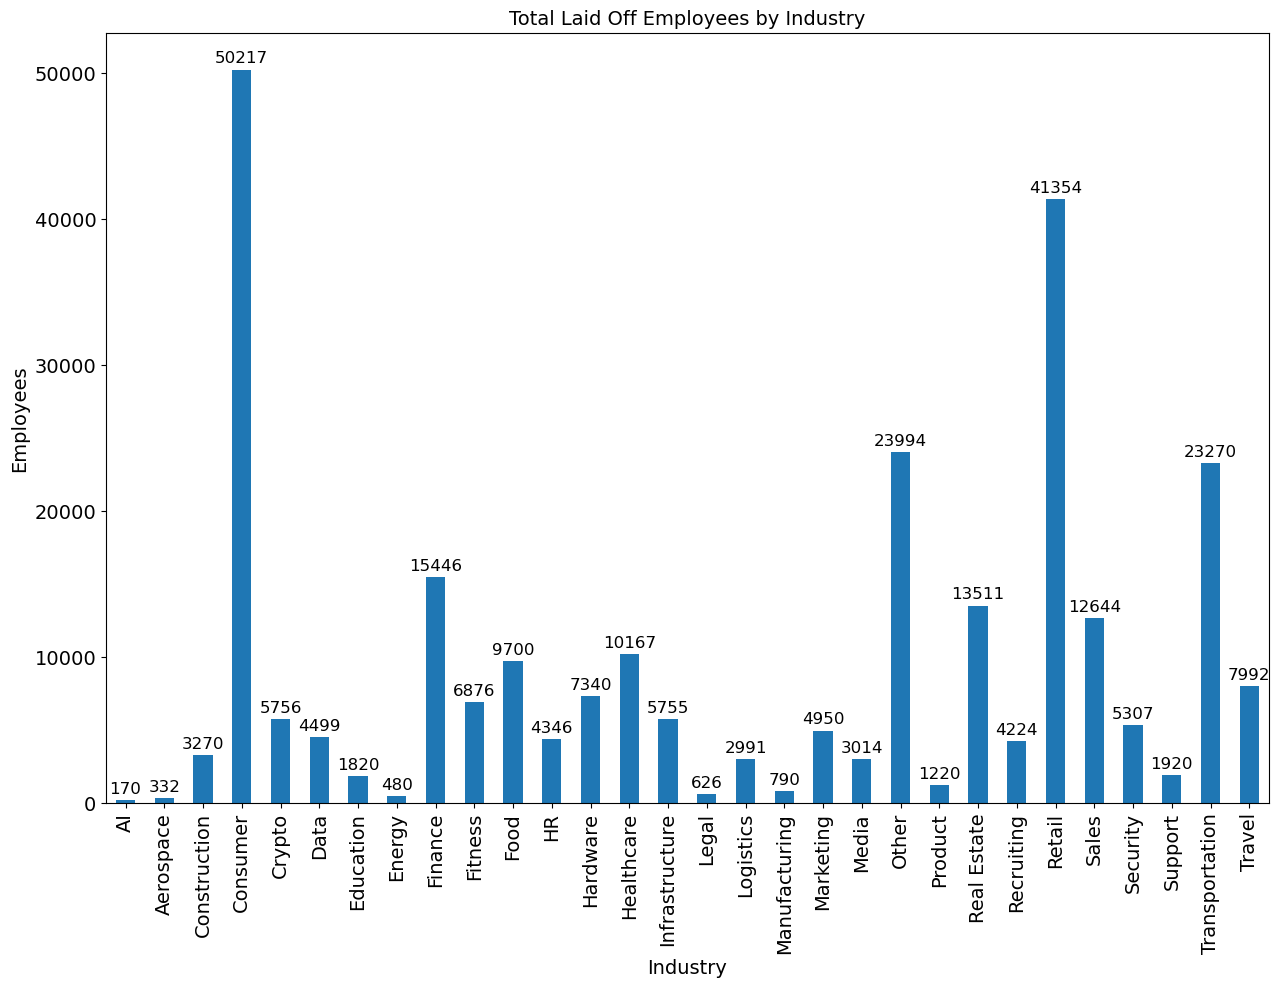

In [93]:
plt.figure(figsize = (15, 10) )

bar_chart = industry_totals.plot.bar(fontsize=14)
plt.ylabel("Employees", fontsize=14)
plt.xlabel('Industry', fontsize=14)
plt.title("Total Laid Off Employees by Industry", fontsize=14)

# Iterating over the bars one-by-one
for bar in bar_chart.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    bar_chart.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

Text(0, 0.5, 'Occurences')

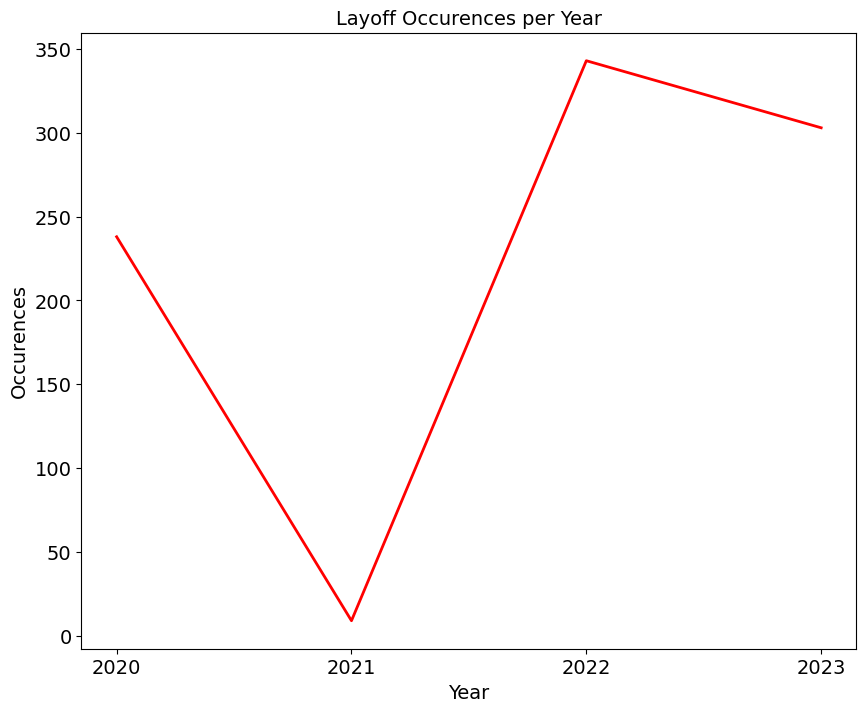

In [94]:
industry_occurences = df_a.groupby(df_a["Date_layoffs"].dt.year).count()
industry_occurences_df = pd.DataFrame(industry_occurences['#']).sort_values('Date_layoffs', ascending=True).head(4)

industry_occurences_df.plot(legend=False, color='red', linewidth=2, figsize=(10,8), fontsize=14)
plt.title('Layoff Occurences per Year', fontsize=14)
plt.xticks([2020, 2021, 2022, 2023])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Occurences', fontsize=14)

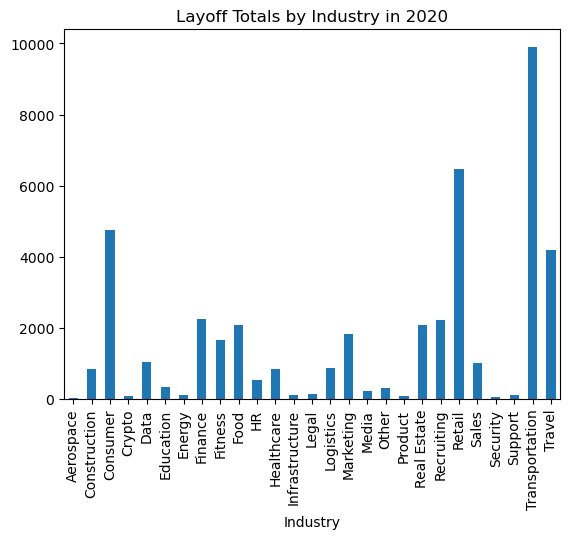

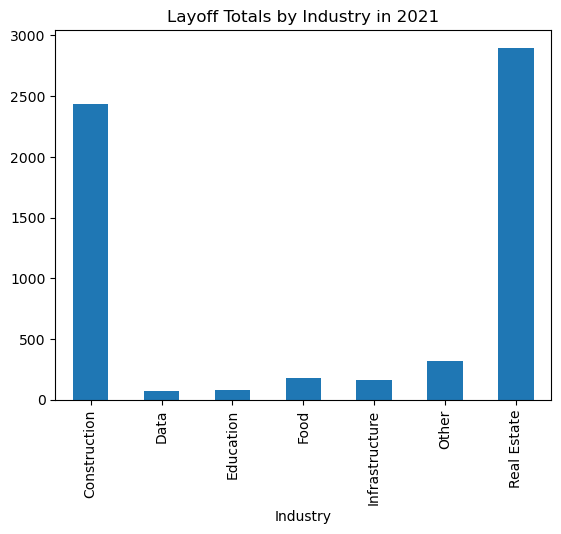

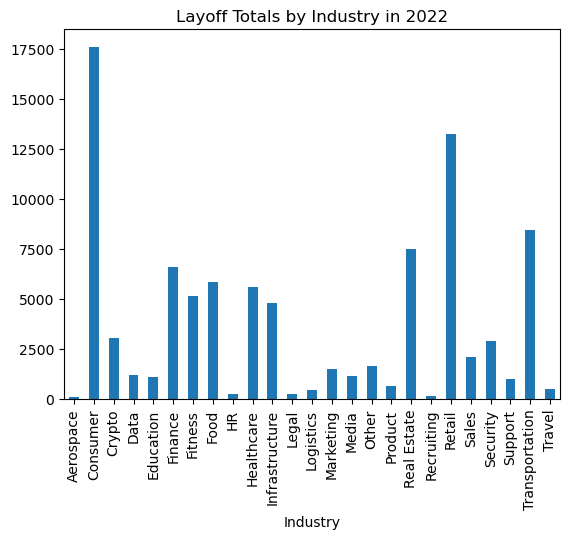

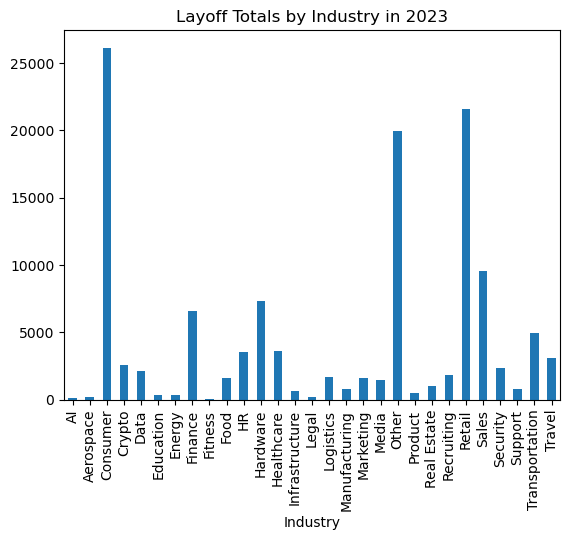

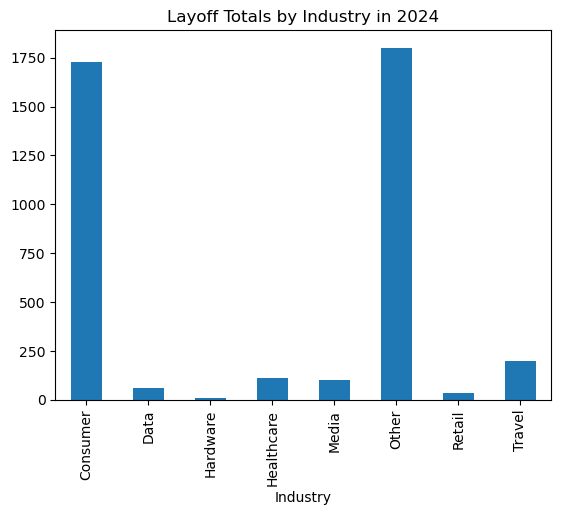

In [112]:
layoffs_per_year_by_industry = df_a.groupby([df_a["Date_layoffs"].dt.year , 'Industry'])
layoffs_by_industry = layoffs_per_year_by_industry['Laid_Off'].sum()
layoffs_by_industry_df = pd.DataFrame(layoffs_by_industry)
layoffs_2020_by_industry_df = layoffs_by_industry_df.query("Date_layoffs == 2020").reset_index()
layoffs_2020_by_industry_df = layoffs_2020_by_industry_df.drop('Date_layoffs', axis=1)
layoffs_2021_by_industry_df = layoffs_by_industry_df.query("Date_layoffs == 2021").reset_index()
layoffs_2021_by_industry_df = layoffs_2021_by_industry_df.drop('Date_layoffs', axis=1)
layoffs_2022_by_industry_df = layoffs_by_industry_df.query("Date_layoffs == 2022").reset_index()
layoffs_2022_by_industry_df = layoffs_2022_by_industry_df.drop('Date_layoffs', axis=1)
layoffs_2023_by_industry_df = layoffs_by_industry_df.query("Date_layoffs == 2023").reset_index()
layoffs_2023_by_industry_df = layoffs_2023_by_industry_df.drop('Date_layoffs', axis=1)
layoffs_2024_by_industry_df = layoffs_by_industry_df.query("Date_layoffs == 2024").reset_index()
layoffs_2024_by_industry_df = layoffs_2024_by_industry_df.drop('Date_layoffs', axis=1)


fig1 = layoffs_2020_by_industry_df.plot.bar(x='Industry', legend=False, title="Layoff Totals by Industry in 2020")
fig2 = layoffs_2021_by_industry_df.plot.bar(x='Industry', legend=False, title="Layoff Totals by Industry in 2021")
fig3 = layoffs_2022_by_industry_df.plot.bar(x='Industry', legend=False, title="Layoff Totals by Industry in 2022")
fig4 = layoffs_2023_by_industry_df.plot.bar(x='Industry', legend=False, title="Layoff Totals by Industry in 2023")
fig5 = layoffs_2024_by_industry_df.plot.bar(x='Industry', legend=False, title="Layoff Totals by Industry in 2024")
